# Feature Selection-Information gain - mutual information In Regression Problem Statements
<b>Mutual Information</b>
Estimate mutual information for a <b>continuous target variable</b>.

Mutual information (MI) between two random variables is a <b>non-negative value</b>, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

<b>Inshort</b>

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

<b>I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.</b>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile

In [2]:
# Here our target variable is SalePrice
df = pd.read_csv("File/housing_data.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Check null value 
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
# For learning purpose we ignore the feature engenieering part hare
# We just consider the numerical column and work with them

numerical_cols = list(df.select_dtypes(include=['int64','float64']).columns)
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [7]:
df2 = df[numerical_cols]
df2.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
df2.drop(labels=['Id'],axis='columns',inplace=True)

c:\users\alami\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
df2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
df2.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [11]:
df3 = df2.fillna(df2.mean())
df3.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
df3.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [13]:
# Split the features and label

features = df3.drop(labels=["SalePrice"],axis=1)
label = df3["SalePrice"]

In [14]:
### It is always a good practice to split train and test data to avoid overfitting

x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.3,random_state=0)

In [15]:
x_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,70.049958,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,70.049958,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.000000,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.000000,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.000000,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.000000,9430,8,5,1999,1999,673.0,1163,0,...,856,0,128,0,0,180,0,0,7,2009
835,20,60.000000,9600,4,7,1950,1995,0.0,442,0,...,436,290,0,0,0,0,0,0,2,2010
1216,90,68.000000,8930,6,5,1978,1978,0.0,0,0,...,539,0,0,0,0,0,0,0,4,2010
559,120,70.049958,3196,7,5,2003,2004,18.0,0,0,...,420,143,20,0,0,0,0,0,10,2006


In [16]:
# determine the mutual information

mutual_info = mutual_info_regression(X= x_train, y= y_train)

In [17]:
mutual_info

array([0.25016933, 0.21011799, 0.16553754, 0.53190109, 0.1011374 ,
       0.35317569, 0.24874208, 0.11295221, 0.1580884 , 0.01226475,
       0.11359339, 0.3820772 , 0.31192391, 0.23057595, 0.00648337,
       0.48122202, 0.04128023, 0.01252896, 0.25482847, 0.0906294 ,
       0.061845  , 0.01975843, 0.18335826, 0.17601515, 0.26103569,
       0.37431826, 0.37057611, 0.06547247, 0.17678526, 0.00351886,
       0.00250945, 0.02073624, 0.00275782, 0.        , 0.        ,
       0.00717639])

In [18]:
mutual_info2 = pd.Series(data= mutual_info, index= x_train.columns)
mutual_info2.sort_values(ascending=False)

OverallQual      0.531901
GrLivArea        0.481222
TotalBsmtSF      0.382077
GarageCars       0.374318
GarageArea       0.370576
YearBuilt        0.353176
1stFlrSF         0.311924
GarageYrBlt      0.261036
FullBath         0.254828
MSSubClass       0.250169
YearRemodAdd     0.248742
2ndFlrSF         0.230576
LotFrontage      0.210118
TotRmsAbvGrd     0.183358
OpenPorchSF      0.176785
Fireplaces       0.176015
LotArea          0.165538
BsmtFinSF1       0.158088
BsmtUnfSF        0.113593
MasVnrArea       0.112952
OverallCond      0.101137
HalfBath         0.090629
WoodDeckSF       0.065472
BedroomAbvGr     0.061845
BsmtFullBath     0.041280
ScreenPorch      0.020736
KitchenAbvGr     0.019758
BsmtHalfBath     0.012529
BsmtFinSF2       0.012265
YrSold           0.007176
LowQualFinSF     0.006483
EnclosedPorch    0.003519
PoolArea         0.002758
3SsnPorch        0.002509
MiscVal          0.000000
MoSold           0.000000
dtype: float64

<AxesSubplot:>

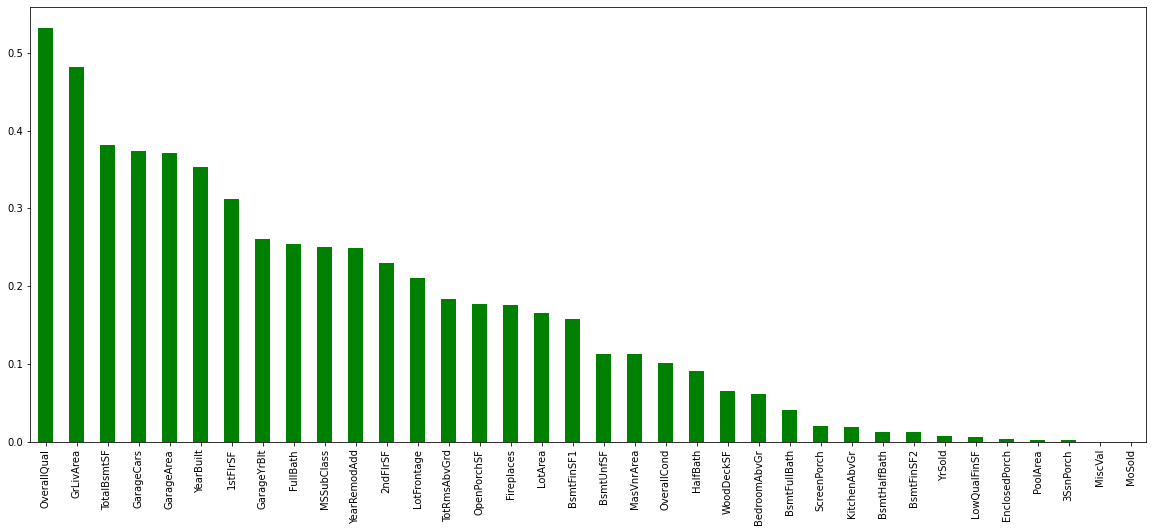

In [19]:
mutual_info2.sort_values(ascending=False).plot.bar(figsize=(20,8),color='green')

In [20]:
# here we used select the features using percentile
## Selecting the top 20 percentile

select_top_cols = SelectPercentile(score_func= mutual_info_regression, percentile= 20)
select_top_cols.fit(x_train,y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x0000018BDFB0E430>)

In [21]:
select_top_cols.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [22]:
x_train.columns[select_top_cols.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [23]:
others_cols = [col for col in x_train.columns if col not in x_train.columns[select_top_cols.get_support()]]
others_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']